## env : pycromanager

In [3]:
from watermark import watermark
print(watermark())

Last updated: 2023-05-30T10:22:33.995157-05:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
CPU cores   : 8
Architecture: 64bit



## loading dependencies

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
from pycromanager import Core

core = Core()
print(core)

In [6]:
def obj_to_list(name):
    name = [name.get(i) for i in range(name.size())]
    return name

## demo for core functions

In [60]:
loaded_devices = core.get_loaded_devices()

In [61]:
exposure = core.get_exposure()

In [62]:
exposure

10

In [63]:
auto_shutter = core.get_property('Core', 'AutoShutter')
##core.set_property('Core', 'AutoShutter', 0)

### Snap an Image

In [64]:
core.snap_image()

In [65]:
tagged_image = core.get_tagged_image()

In [67]:
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])


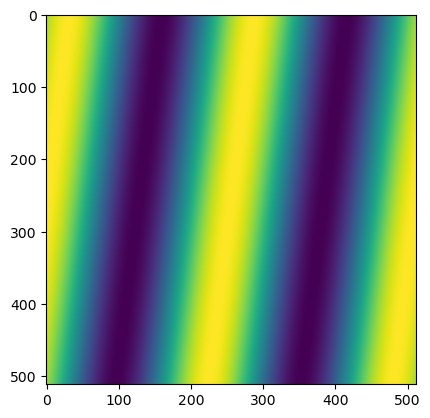

In [69]:
imshow(pixels)

In [70]:
core.get_xy_stage_position()

<pycromanager.zmq_bridge._bridge.java_awt_geom_Point2D$Double at 0x278cf247e80>

In [71]:
def obj_to_list(name):
    name = [name.get(i) for i in range(name.size())]
    return name

In [72]:
devices = core.get_loaded_devices()
obj_to_list(devices)

['DHub',
 'Camera',
 'Dichroic',
 'Emission',
 'Excitation',
 'Objective',
 'Z',
 'Path',
 'XY',
 'Shutter',
 'Autofocus',
 'Core']

In [73]:
core.get_device_name('Camera')

'DCam'

In [79]:
cam_prop = core.get_device_property_names('Camera')
obj_to_list(cam_prop)

['AllowMultiROI',
 'AsyncPropertyDelayMS',
 'AsyncPropertyFollower',
 'AsyncPropertyLeader',
 'Binning',
 'BitDepth',
 'CCDTemperature',
 'CCDTemperature RO',
 'CameraID',
 'CameraName',
 'Description',
 'DisplayImageNumber',
 'DropPixels',
 'Exposure',
 'FastImage',
 'FractionOfPixelsToDropOrSaturate',
 'Gain',
 'HubID',
 'MaximumExposureMs',
 'Mode',
 'MultiROIFillValue',
 'Name',
 'Offset',
 'OnCameraCCDXSize',
 'OnCameraCCDYSize',
 'Photon Conversion Factor',
 'Photon Flux',
 'PixelType',
 'ReadNoise (electrons)',
 'ReadoutTime',
 'RotateImages',
 'SaturatePixels',
 'ScanMode',
 'SimulateCrash',
 'StripeWidth',
 'TestProperty1',
 'TestProperty2',
 'TestProperty3',
 'TestProperty4',
 'TestProperty5',
 'TestProperty6',
 'TransposeCorrection',
 'TransposeMirrorX',
 'TransposeMirrorY',
 'TransposeXY',
 'TriggerDevice',
 'UseExposureSequences']

In [80]:
core.get_property('Camera', 'Gain')

'3'

In [81]:
core.set_property('Camera', 'Gain', 3)
core.get_property('Camera', 'Gain')

'3'

In [82]:
config_groups = core.get_available_config_groups()
obj_to_list(config_groups)

['Camera', 'Channel', 'LightPath', 'Objective', 'System']

In [83]:
camera_config_presets = core.get_available_configs('Camera')
obj_to_list(camera_config_presets)

['HighRes', 'LowRes', 'MedRes']

In [96]:
xy_pos = core.get_xy_stage_position()
xy_pos.to_string()

'Point2D.Double[-0.0, -0.0]'

In [97]:
core.get_position()

0

In [113]:
core.set_relative_xy_position(1.0, 1.0)

In [114]:
xy_pos = core.get_xy_stage_position()
xy_pos.to_string()

'Point2D.Double[101.00999999999999, 101.00999999999999]'

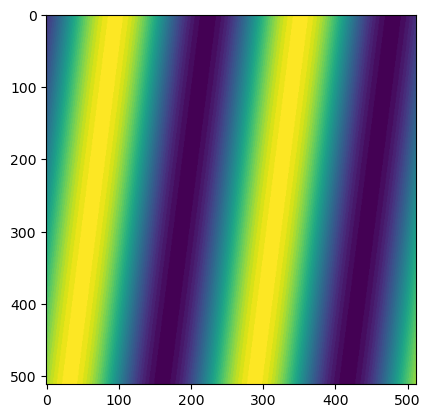

In [115]:
core.snap_image()
tagged_image = core.get_tagged_image()
pix = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
imshow(pix)

## MOSAIC

In [3]:
from pycromanager import Acquisition, multi_d_acquisition_events


In [23]:
xy = np.array([[0,0], [0,1], [0,2],
               [1,0], [1,2], [1,2],
               [2,0], [2,1], [2,2]])
xy

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 2],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2]])

In [24]:
with Acquisition(directory=r"C:\Users\lociu\Desktop\PriyaM\image_collection", 
                        name='xy_tile_try20') as acq:
    events = multi_d_acquisition_events(xy_positions=xy)
    acq.acquire(events)  
                            


with XYTiledAcquisition(directory=r"C:\Users\lociu\Desktop\PriyaM\image_collection", 
                        name='xy_tile_try15', 
                        tile_overlap=10) as acq:
    #acquire a 2 x 1 grid
    acq.acquire({'axes':
                    {'row': 0, 'col': 0}
                            })
    time.sleep(2)                        
    acq.acquire({'axes':
                    {'row': 1, 'col': 0}
                            })
    time.sleep(2)     

In [43]:
acq.mark_finished()

In [39]:
dataset = acq.get_dataset()

In [41]:
#dataset.as_array()

In [8]:
save_dir = r"C:\Users\lociu\Desktop\PriyaM\image_collection"
acq = XYTiledAcquisition(directory= save_dir, 
                         name='xy_tile_try12', #int = 4827,
                         tile_overlap=10,debug = True)

binding 4828


In [47]:
axis_dict = {'axes':{'row': 0, 'col': 0}}
acq.acquire(axis_dict)

axis_dict = {'axes':{'row': 1, 'col': 0}}
acq.acquire(axis_dict)

axis_dict = {'axes':{'row': 1, 'col': 1}}
acq.acquire(axis_dict)

axis_dict = {'axes':{'row': 0, 'col': 1}}
acq.acquire(axis_dict)

In [9]:
data = acq.get_dataset()

In [10]:
#data.path

In [11]:
#data.has_image()

False

In [13]:
#data.axes

In [ ]:
#acq.await_completion()

In [14]:
acq.mark_finished()

got event(s): None
DEBUG, sending: {'events': [{'special': 'acquisition-end'}]}
closed socket 4828


In [16]:
data = acq.get_dataset()

In [23]:
v = acq.get_viewer()

In [24]:
v.close()

In [27]:
#v.is_acquisition_paused()

In [50]:
#data.read_image(row=0, col =1)

In [51]:
#data.as_array().shape

In [28]:
acq.abort()

In [52]:
#data.as_array().shape